In [17]:
import numpy as np
from math import log,e
import matplotlib.pyplot as plt

In [18]:
def insert_ones(array2d:np.array):
    """
    So, we don't want to write extra boiler plate code or formula for calculating the 
    bias separately. That's why we will make it part of the weights w itself.
    Since we are doing that, np.dot(x,w) will also need another term in x to account
    for the extra bias term. so we will just put a one at the starting of each x vector
    (2,3,5) --> (1,2,3,5)

    this function just puts a column of 1 into the left side of the X array
    """
    return np.insert(array2d,0,values=1,axis=1)

In [19]:
def gradient_descent(w:np.array,lr:float,X:np.array,Y:np.array,max_steps:int,cost_func,grad_decr,predictY):
    """
    w : coeffs. inputs w are the initial coeffs which are assumed
    lr : learning rate
    X,Y : x,y values of points
    Ɛ ~= 0 (some small value close to 0). We want to stop our loop when the cost function 
                                          becomes ~= Ɛ

    returns : updated weights w
    """
    costs = []
    Ɛ = 10**-3
    cost = None
    for step in range(max_steps):
        w_prev = w.copy()
        
        Y_pred = predictY(w,X)
        decr_w = grad_decr(w,X,Y_pred,Y)

        w= w_prev - lr*decr_w

        cost = cost_func(w,X,Y_pred,Y)
        costs.append(cost)
        print(cost)
        # print(w)
        if (cost)**2 < Ɛ:
            break
    
    plt.scatter([_ for _ in range(len(costs))],costs)
    plt.title("value of cost function over time")
    plt.show()

    return w

In [20]:
def sigmoid(t: float):
    return 1 / (1 + np.exp(-t))

def prob(w: np.array, x: np.array, y: float):
    return sigmoid(y * np.dot(w, x))


def logloss(w:np.array,X:np.array,Y_pred:np.array,Y=None):
    n = len(Y)
    # print(sum([int(Y_pred[i]<0) + int(1-Y_pred[i]<0) for i in range(n)]))
    # print(sum([int(1-Y_pred[i]==0) for i in range(n)]))
    # print(sum([int(Y_pred[i]==0) for i in range(n)]))

    return -(1/n)*sum([Y[i]*log(Y_pred[i]) + (1-Y[i])*log(1-Y_pred[i]) for i in range(n)])

def grad_decr_logloss(w: np.array, X: np.array, Y_pred: np.array,Y=None):
    n = len(Y)
    return (1/n) * np.dot(X.T,Y_pred-Y)




# functions defined in edx implementation don't work : 
def _logistic_cost_func(w: np.array, X: np.array, Y_pred: np.array,Y=None):
    return -sum([log(prob(w, X[i], Y_pred[i])) for i in range(len(Y_pred))])

def _logistic_grad_decr(w: np.array, X: np.array, Y_pred: np.array,Y=None):
    return -np.sum(np.array([Y_pred[i] * X[i] * prob(w, X[i], -Y_pred[i]) for i in range(len(Y_pred))]))

In [21]:
class BinaryLogisticRegression():

    def fit(self,X,Y,init_w=None,lr=0.05,max_steps=500,cost_func=logloss,grad_decr=grad_decr_logloss):
        if init_w == None:
            init_w = np.zeros(len(X[0]))
        self.cost_func = cost_func
        self.w = gradient_descent(w=init_w,lr=lr,X=X,Y=Y,max_steps=max_steps,cost_func=cost_func,grad_decr=grad_decr,predictY=self.predictYcontinuous)

    def predict(self,x:np.array):
        # input: 1 x vector
        return sigmoid(np.dot(self.w,x))
    
    def predictYcontinuous(self,w:np.array,X:np.array):
        #
        # same thing as predict() but for an array of x vectors, instead of a one x vector
        return [sigmoid(np.dot(w,X[i])) for i in range(len(X))]

    def predictYdiscrete(self,w:np.array,X:np.array):
        #
        # same thing as predict() but for an array of x vectors, instead of a one x vector
        return [1 if sigmoid(np.dot(w,X[i])) >0.5 else 0 for i in range(len(X))]

    def score(self,X,Y):
        Y_pred = np.array(self.predictYdiscrete(self.w,X))
        return 1 - sum((Y-Y_pred)**2)/len(Y_pred) # self.cost_func(self.w, X, predict,Y)

0.6931471805599454
0.6923982057253252
0.6916545141720536
0.6909159736363426
0.690182455770799
0.689453836030054
0.6887299935595372
0.6880108110873242
0.6872961748189805
0.686585974335336
0.6858801024931132
0.6851784553283429
0.6844809319624997
0.6837874345112847
0.6830978679959941
0.6824121402574046
0.6817301618721132
0.6810518460712689
0.6803771086616293
0.6797058679488884
0.6790380446632119
0.6783735618869206
0.6777123449842667
0.6770543215332487
0.6763994212594049
0.6757475759715352
0.6750987194993008
0.6744527876326448
0.6738097180629891
0.6731694503261549
0.6725319257469622
0.6718970873854567
0.671264879984727
0.6706352499202558
0.6700081451507742
0.6693835151705678
0.6687613109631967
0.668141484956591
0.6675239909794781
0.666908784219109
0.666295821180241
0.6656850596453459
0.6650764586360034
0.6644699783754511
0.6638655802522505
0.6632632267850447
0.6626628815883674
0.6620645093394822
0.6614680757462126
0.6608735475157398
0.6602808923243391
0.6596900787880249
0.6591010764340806


0.3417510306653024
0.3416292637918721
0.3415076166366417
0.34138608902598566
0.34126468078659583
0.34114339174548064
0.3410222217299638
0.34090117056768465
0.34078023808659696
0.3406594241149685
0.34053872848137967
0.3404181510147239
0.34029769154420636
0.34017734989934345
0.3400571259099616
0.3399370194061981
0.3398170302184985
0.3396971581776176
0.3395774031146175
0.3394577648608683
0.33933824324804607
0.33921883810813336
0.3390995492734178
0.3389803765764915
0.33886131985025125
0.33874237892789655
0.3386235536429301
0.3385048438291567
0.3383862493206824
0.3382677699519143
0.3381494055575597
0.33803115597262545
0.33791302103241744
0.3377950005725398
0.3376770944288945
0.33755930243768023
0.3374416244353928
0.33732406025882306
0.3372066097450578
0.3370892727314778
0.33697204905575834
0.3368549385558676
0.3367379410700668
0.336621056436909
0.33650428449523895
0.33638762508419245
0.3362710780431952
0.3361546432119629
0.3360383204305002
0.3359221095391003
0.3358060103783439
0.33569002278

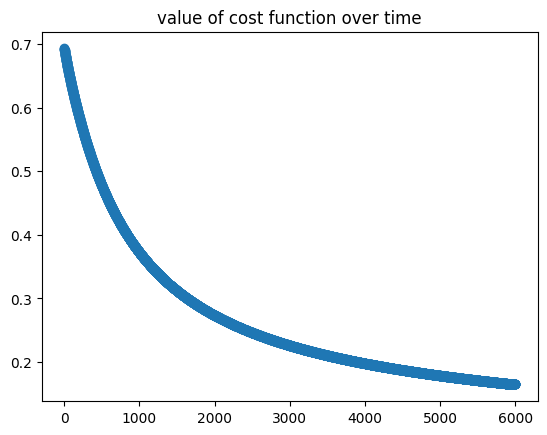

In [22]:
clf = BinaryLogisticRegression()
X = np.array(
    [np.array([1,x_i]) for x_i in [0.05, +0.1, +0.2, +0.3, +0.4, +0.5, +0.6, +0.7, +0.8, +0.9]]
)
Y = np.array([0,0,0,0,0, +1, +1, +1, +1, +1])
clf.fit(X, Y,cost_func=logloss,grad_decr=grad_decr_logloss, lr=0.05,max_steps=6000)

In [23]:
print(clf.w)

[-4.32113638  9.72660974]


In [24]:
print("\n".join(map(str, zip(clf.predictYcontinuous(clf.w, X), Y))))

(0.02114860508852148, 0)
(0.033945124590326524, 0)
(0.08503565738116012, 0)
(0.19731618275444568, 0)
(0.3940087380137817, 0)
(0.6323167202966331, 1)
(0.8197758311179245, 1)
(0.923260187122923, 1)
(0.9695324397446692, 1)
(0.9882584728487632, 1)


In [25]:
clf.predict([1,8])

1.0

In [26]:
clf.predict([1,0.0])

0.013110606961031316

In [27]:
1 if clf.predict([1,+8]) > 0.5 else 0

1

In [28]:
clf.score(X=X,Y=Y)

1.0

In [29]:
display(X)

array([[1.  , 0.05],
       [1.  , 0.1 ],
       [1.  , 0.2 ],
       [1.  , 0.3 ],
       [1.  , 0.4 ],
       [1.  , 0.5 ],
       [1.  , 0.6 ],
       [1.  , 0.7 ],
       [1.  , 0.8 ],
       [1.  , 0.9 ]])

In [35]:
from sklearn import datasets

bc = datasets.load_breast_cancer()

X,y = bc.data,bc.target
# display(X)
# display(y)


from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y)
# display(X_train)
print(X_train.shape)
X_train = insert_ones(X_train)
X_test = insert_ones(X_test)
# display(X_train)
print(X_train.shape)

(426, 30)
(426, 31)


0.6931471805599468
0.7484893283253597
0.995766072757322
1.506265360766025
0.9169330496755671
1.4362432559451543
0.9265202468652319
1.447523278590913
0.8846153444189506
1.40184734169407
0.8795721026944103
1.3940003495893398
0.8518340382238465
1.3559587232022368
0.8433470346530929
1.3393387569605006
0.822954286671805
1.3039491642285679
0.8142812397132019
1.2826853548867048
0.7984478102119215
1.248751220935463
0.7902775798641832
1.2248826012435101
0.7775035749225806
1.192427965450631
0.7697107606294515
1.1670941449265277
0.759030938257329
1.1364035955081706
0.7513386544633189
1.1103900582842798
0.7420273684665184
1.0816396204903114
0.7342432086155506
1.0556530923820902
0.7257013272586599
1.0287890680932998
0.7177650720072724
1.0034545262301193
0.7095396076901233
0.9782589098500641
0.7014689918141975
0.9539814682353599
0.6932936361351419
0.9302229006258784
0.6851146136304801
0.9071464091218174
0.6768797899941382
0.8846573038315941
0.6686047548784285
0.862760779823388
0.6602840423947802
0.8

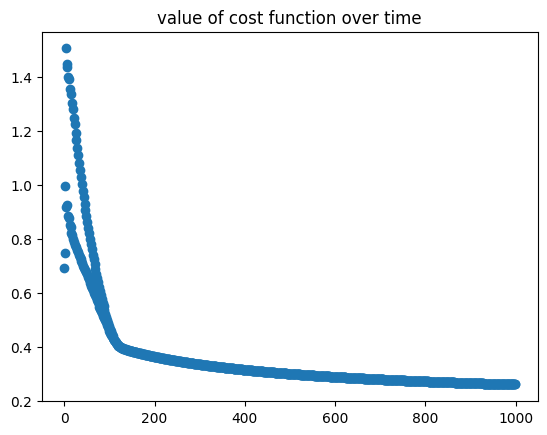

In [42]:
clf = BinaryLogisticRegression()
clf.fit(X_train,Y_train,lr=0.00001,max_steps=1000)

In [43]:
Y_test

array([0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0])

In [47]:
Y_pred = clf.predictYdiscrete(clf.w,X_test)
np.array(Y_pred)

array([0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0])

In [48]:
clf.score(X=X_test,Y=Y_test)

0.9230769230769231